In [68]:
import numpy as np
import gzip
import pandas as pd
#import pandas_profiling
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
import matplotlib as mpb
import pickle

In [69]:
detailed_listing = 'http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/data/listings.csv.gz'
summary_listing = 'http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/visualisations/listings.csv'

In [78]:
det_list = pd.read_csv(detailed_listing, compression='gzip', error_bad_lines=False, warn_bad_lines=False)

print(det_list.shape)
det_list.head()

(40125, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.19
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [79]:
summary_list = pd.read_csv(summary_listing, error_bad_lines=False, warn_bad_lines=False )

print(summary_list.shape)
summary_list.head()

(40125, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [4]:
calendar_url = 'http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/data/calendar.csv.gz'

In [116]:
calendar_df = pd.read_csv(calendar_url, compression='gzip', warn_bad_lines=False, error_bad_lines=False)

print(calendar_df.shape)
calendar_df.head()

(14670849, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,46858,2019-12-06,f,$300.00,$300.00,3.0,30.0
1,130915,2019-12-06,f,$90.00,$90.00,1.0,730.0
2,130915,2019-12-07,f,$90.00,$90.00,1.0,730.0
3,130915,2019-12-08,f,$90.00,$90.00,1.0,730.0
4,130915,2019-12-09,f,$90.00,$90.00,1.0,730.0


In [117]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day
calendar_df = calendar_df.drop(columns='date')
calendar_df['available'] = calendar_df['available'].astype(str)
calendar_df['price'] = calendar_df['price'].replace('$','')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str[1:]
# Take care of NAs so this code can run
calendar_df['minimum_nights'].fillna(calendar_df['minimum_nights'].mode()[0], inplace=True)
calendar_df['minimum_nights'] = calendar_df['minimum_nights'].astype(int)
calendar_df['maximum_nights'].fillna(calendar_df['maximum_nights'].mode()[0], inplace=True)
calendar_df['maximum_nights'] = calendar_df['maximum_nights'].astype(int)
calendar_df['price'] = calendar_df['price'].str[1:]
calendar_df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day
0,46858,f,300.00,300.00,3,30,2019,12,6
1,130915,f,90.00,90.00,1,730,2019,12,6
2,130915,f,90.00,90.00,1,730,2019,12,7
3,130915,f,90.00,90.00,1,730,2019,12,8
4,130915,f,90.00,90.00,1,730,2019,12,9


In [8]:
list(summary_list.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [9]:
list(det_list.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [10]:
#pandas_profiling.ProfileReport(det_list)

In [72]:
det_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,t,f,flexible,f,f,1,1,0,0,0.19
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.33
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [163]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [164]:
columns = ['price', 'beds', 'bedrooms', 'bathrooms', 'zipcode', 'neighbourhood', 
           'property_type', 'room_type', 'accommodates', 'guests_included',
           'minimum_nights', 'instant_bookable', 'amenities']

train = det_list[columns]

train.head()

,price,beds,bedrooms,bathrooms,zipcode,neighbourhood,property_type,room_type,accommodates,guests_included,minimum_nights,instant_bookable,amenities
0,$122.00,3.0,2.0,2.0,90230,Culver City,Condominium,Entire home/apt,6,3,30,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
1,$168.00,3.0,3.0,1.0,91505,Burbank,House,Entire home/apt,6,6,2,t,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,$79.00,1.0,1.0,1.5,90046,Hollywood,Apartment,Private room,1,1,30,t,"{Internet,Wifi,""Air conditioning"",""Wheelchair ..."
3,$140.00,1.0,1.0,1.0,90405,Santa Monica,Apartment,Private room,1,1,1,f,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S..."
4,$80.00,1.0,1.0,1.0,90706,Bellflower,Apartment,Entire home/apt,2,1,2,f,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


In [165]:
def create_bool_from_dict(df, seriesdict, feature):
    df[feature] = df[seriesdict].str.contains(feature)
    return df[feature]

amenities_list = ['Cable TV', 'Wifi', 'Kitchen', 'Air conditioning', 'Pool', 'Hot tub', 'grill', 'Washer', 'Dryer']

for x in amenities_list:
    create_bool_from_dict(train, 'amenities', x)

train.head()


d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,beds,bedrooms,bathrooms,zipcode,neighbourhood,property_type,room_type,accommodates,guests_included,...,amenities,Cable TV,Wifi,Kitchen,Air conditioning,Pool,Hot tub,grill,Washer,Dryer
0,$122.00,3.0,2.0,2.0,90230,Culver City,Condominium,Entire home/apt,6,3,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,True,False,True,True
1,$168.00,3.0,3.0,1.0,91505,Burbank,House,Entire home/apt,6,6,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,False,True,True,True
2,$79.00,1.0,1.0,1.5,90046,Hollywood,Apartment,Private room,1,1,...,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",False,True,True,True,False,True,False,True,True
3,$140.00,1.0,1.0,1.0,90405,Santa Monica,Apartment,Private room,1,1,...,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",False,True,True,False,False,False,False,True,True
4,$80.00,1.0,1.0,1.0,90706,Bellflower,Apartment,Entire home/apt,2,1,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,False,True,False,True,True


In [166]:
print(train.isna().sum())

price                  0
beds                  92
bedrooms              70
bathrooms             25
zipcode              464
neighbourhood       2225
property_type          0
room_type              0
accommodates           0
guests_included        0
minimum_nights         0
instant_bookable       0
amenities              0
Cable TV               0
Wifi                   0
Kitchen                0
Air conditioning       0
Pool                   0
Hot tub                0
grill                  0
Washer                 0
Dryer                  0
dtype: int64


In [167]:
train['price'] = train['price'].str.replace('$','')
train['price'] = train['price'].str.replace(',','').astype('float')

train['beds'] = train['beds'].fillna(train['beds'].mode()[0])
#train['beds'].fillna(train['beds'].mode()[0], inplace=True)
train['beds'] = train['beds'].astype(int)

train['zipcode'] = train['zipcode'].str.strip()
train['zipcode'] = np.where(train['zipcode'].str.contains('ca', case = False), '', train['zipcode'])
train['zipcode'] = train['zipcode'].str.replace(' ', '')
train['zipcode'] = train['zipcode'].str.replace('139SValenciaAve,Glendora.', '')
train['zipcode'] = train['zipcode'].str[:5]
train['zipcode'] = train['zipcode'].replace('',np.nan)
train['zipcode'] = train['zipcode'].astype(str)

train['instant_bookable'] = np.where(train['instant_bookable'].str.contains('t'), 1, 0)

d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\csfiles\lambda\git\airbnb3\airenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [168]:
train['zipcode'].value_counts()

nan      8723
90291    1356
90046    1135
90028     943
90026     698
         ... 
93553       1
0           1
92612       1
10001       1
92821       1
Name: zipcode, Length: 295, dtype: int64

In [169]:
print(train.isna().sum())

price                  0
beds                   0
bedrooms              70
bathrooms             25
zipcode                0
neighbourhood       2225
property_type          0
room_type              0
accommodates           0
guests_included        0
minimum_nights         0
instant_bookable       0
amenities              0
Cable TV               0
Wifi                   0
Kitchen                0
Air conditioning       0
Pool                   0
Hot tub                0
grill                  0
Washer                 0
Dryer                  0
dtype: int64


In [170]:
train.dtypes

price               float64
beds                  int32
bedrooms            float64
bathrooms           float64
zipcode              object
neighbourhood        object
property_type        object
room_type            object
accommodates          int64
guests_included       int64
minimum_nights        int64
instant_bookable      int32
amenities            object
Cable TV               bool
Wifi                   bool
Kitchen                bool
Air conditioning       bool
Pool                   bool
Hot tub                bool
grill                  bool
Washer                 bool
Dryer                  bool
dtype: object

In [171]:
train.head()

,price,beds,bedrooms,bathrooms,zipcode,neighbourhood,property_type,room_type,accommodates,guests_included,...,amenities,Cable TV,Wifi,Kitchen,Air conditioning,Pool,Hot tub,grill,Washer,Dryer
0,122.0,3,2.0,2.0,90230,Culver City,Condominium,Entire home/apt,6,3,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,True,False,True,True
1,168.0,3,3.0,1.0,91505,Burbank,House,Entire home/apt,6,6,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,False,True,True,True
2,79.0,1,1.0,1.5,90046,Hollywood,Apartment,Private room,1,1,...,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",False,True,True,True,False,True,False,True,True
3,140.0,1,1.0,1.0,90405,Santa Monica,Apartment,Private room,1,1,...,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",False,True,True,False,False,False,False,True,True
4,80.0,1,1.0,1.0,90706,Bellflower,Apartment,Entire home/apt,2,1,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,False,True,False,True,True


In [172]:
sum(train['neighbourhood'].value_counts() > 5)

153

In [173]:
train['room_type'].value_counts()

Entire home/apt    25189
Private room       13117
Shared room         1491
Hotel room           328
Name: room_type, dtype: int64

In [174]:
train['bedrooms'].value_counts()

1.0     23235
2.0      6902
0.0      4238
3.0      3277
4.0      1434
5.0       627
6.0       193
7.0        86
8.0        30
9.0        14
10.0        9
11.0        6
12.0        3
21.0        1
Name: bedrooms, dtype: int64

In [175]:
train['bathrooms'].value_counts()

1.0     26690
2.0      6102
1.5      2601
3.0      1282
2.5      1224
3.5       540
4.0       410
4.5       299
5.0       191
5.5       151
0.0       111
0.5       106
6.0       103
6.5        65
8.0        58
7.0        46
7.5        28
11.0       27
8.5        18
10.0       13
9.0        12
9.5         6
11.5        4
10.5        3
13.0        3
12.5        2
12.0        2
13.5        1
16.0        1
15.0        1
Name: bathrooms, dtype: int64

In [176]:
##next will do a linear regression model for a baseline

In [177]:
# Features we want
categorical_features = ['zipcode','neighbourhood','property_type','room_type']
numeric_features = ['price', 'beds', 'bedrooms', 'bathrooms','accommodates','guests_included','minimum_nights','instant_bookable']
bool_features = ['cable tv', 'wifi', 'kitchen', 'air conditioning', 'pool', 'hot tub', 'grill', 'washer', 'dryer']

renamer = dict(zip(amenities_list, bool_features))
print(renamer)

{'Cable TV': 'cable tv', 'Wifi': 'wifi', 'Kitchen': 'kitchen', 'Air conditioning': 'air conditioning', 'Pool': 'pool', 'Hot tub': 'hot tub', 'grill': 'grill', 'Washer': 'washer', 'Dryer': 'dryer'}


In [178]:
train = train.rename(columns=renamer)
train.head()

,price,beds,bedrooms,bathrooms,zipcode,neighbourhood,property_type,room_type,accommodates,guests_included,...,amenities,cable tv,wifi,kitchen,air conditioning,pool,hot tub,grill,washer,dryer
0,122.0,3,2.0,2.0,90230,Culver City,Condominium,Entire home/apt,6,3,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,True,False,True,True
1,168.0,3,3.0,1.0,91505,Burbank,House,Entire home/apt,6,6,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,False,True,True,True
2,79.0,1,1.0,1.5,90046,Hollywood,Apartment,Private room,1,1,...,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",False,True,True,True,False,True,False,True,True
3,140.0,1,1.0,1.0,90405,Santa Monica,Apartment,Private room,1,1,...,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",False,True,True,False,False,False,False,True,True
4,80.0,1,1.0,1.0,90706,Bellflower,Apartment,Entire home/apt,2,1,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,False,True,False,True,True


In [179]:
#categorical_counts = train.select_dtypes(exclude='number').nunique().sort_values()
categorical_counts = []
categorical_counts.append(train[categorical_features].nunique().sort_values())
high_cardi_cols = []
low_cardi_cols = []
for i in categorical_features:
    if train[i].nunique() > 150:
        high_cardi_cols.append(i)
    else:
        low_cardi_cols.append(i)

In [180]:
print(categorical_counts, high_cardi_cols, low_cardi_cols)

[room_type          4
property_type     44
neighbourhood    165
zipcode          295
dtype: int64] ['zipcode', 'neighbourhood'] ['property_type', 'room_type']


In [181]:
ct = ColumnTransformer([("oe", ce.OrdinalEncoder(), high_cardi_cols),
                        ("ohe", ce.OneHotEncoder(use_cat_names=True), low_cardi_cols)])

In [182]:
# We'll impute missing values using the median for numeric columns and the most
# common value for string columns.

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

train = DataFrameImputer().fit_transform(train)

In [183]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    train[feature] = label_encoder.fit_transform(train[feature])

In [184]:
train.head()

,price,beds,bedrooms,bathrooms,zipcode,neighbourhood,property_type,room_type,accommodates,guests_included,...,amenities,cable tv,wifi,kitchen,air conditioning,pool,hot tub,grill,washer,dryer
0,122.0,3,2.0,2.0,77,29,15,0,6,3,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,True,False,True,True
1,168.0,3,3.0,1.0,229,19,25,0,6,6,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,True,False,True,True,True
2,79.0,1,1.0,1.5,50,59,1,2,1,1,...,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",False,True,True,True,False,True,False,True,True
3,140.0,1,1.0,1.0,113,118,1,2,1,1,...,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",False,True,True,False,False,False,False,True,True
4,80.0,1,1.0,1.0,133,14,1,0,2,1,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,True,True,True,False,True,False,True,True


In [185]:
train['price'].describe()

count    40125.000000
mean       225.840673
std        656.723597
min          0.000000
25%         70.000000
50%        110.000000
75%        189.000000
max      25000.000000
Name: price, dtype: float64

In [186]:
features = numeric_features + categorical_features + bool_features
target = 'price'
train_features = train[features]

In [187]:
train_labels = train_features['price']
train_features = train_features.drop(columns=['price'])

In [188]:
X_train = train_features
y_train = train_labels

X_train.shape, y_train.shape

((40125, 20), (40125,))

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.75, 
                                                  test_size = 0.25, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((30093, 20), (10032, 20), (30093,), (10032,))

In [190]:
from xgboost import XGBRegressor


eval_set = [(X_train, y_train), 
            (X_val, y_val)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=100)



[19:40:43] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:664.634	validation_1-rmse:680.207
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:641.613	validation_1-rmse:660.446
[2]	validation_0-rmse:622.054	validation_1-rmse:644.062
[3]	validation_0-rmse:604.029	validation_1-rmse:628.916
[4]	validation_0-rmse:588.751	validation_1-rmse:616.006
[5]	validation_0-rmse:575.676	validation_1-rmse:605.547
[6]	validation_0-rmse:563.57	validation_1-rmse:593.013
[7]	validation_0-rmse:554.166	validation_1-rmse:583.589
[8]	validation_0-rmse:545.501	validation_1-rmse:574.556
[9]	validation_0-rmse:537.977	validation_1-rmse:565.848
[10]	validation_0-rmse:531.605	validation_1-rmse:560.269
[11]	validation_0-rmse:525.356	validation_1-rmse:553.238
[12]	validation_0

[139]	validation_0-rmse:422.003	validation_1-rmse:484.445
[140]	validation_0-rmse:421.744	validation_1-rmse:484.249
[141]	validation_0-rmse:421.552	validation_1-rmse:483.989
[142]	validation_0-rmse:421.18	validation_1-rmse:483.919
[143]	validation_0-rmse:420.964	validation_1-rmse:483.878
[144]	validation_0-rmse:420.862	validation_1-rmse:483.732
[145]	validation_0-rmse:420.5	validation_1-rmse:483.785
[146]	validation_0-rmse:420.421	validation_1-rmse:483.749
[147]	validation_0-rmse:420.339	validation_1-rmse:483.569
[148]	validation_0-rmse:420.29	validation_1-rmse:483.503
[149]	validation_0-rmse:420.088	validation_1-rmse:483.382
[150]	validation_0-rmse:419.911	validation_1-rmse:483.17
[151]	validation_0-rmse:419.724	validation_1-rmse:483.182
[152]	validation_0-rmse:419.712	validation_1-rmse:483.176
[153]	validation_0-rmse:419.697	validation_1-rmse:483.21
[154]	validation_0-rmse:419.45	validation_1-rmse:483.098
[155]	validation_0-rmse:419.423	validation_1-rmse:483.07
[156]	validation_0-rms

[281]	validation_0-rmse:402.609	validation_1-rmse:478.749
[282]	validation_0-rmse:402.587	validation_1-rmse:478.739
[283]	validation_0-rmse:402.301	validation_1-rmse:478.665
[284]	validation_0-rmse:402.272	validation_1-rmse:478.586
[285]	validation_0-rmse:402.148	validation_1-rmse:478.561
[286]	validation_0-rmse:402.119	validation_1-rmse:478.428
[287]	validation_0-rmse:401.989	validation_1-rmse:478.416
[288]	validation_0-rmse:401.859	validation_1-rmse:478.235
[289]	validation_0-rmse:401.699	validation_1-rmse:478.313
[290]	validation_0-rmse:401.514	validation_1-rmse:478.155
[291]	validation_0-rmse:401.424	validation_1-rmse:477.875
[292]	validation_0-rmse:401.333	validation_1-rmse:477.751
[293]	validation_0-rmse:401.315	validation_1-rmse:477.767
[294]	validation_0-rmse:401.158	validation_1-rmse:477.634
[295]	validation_0-rmse:401.142	validation_1-rmse:477.613
[296]	validation_0-rmse:400.984	validation_1-rmse:477.817
[297]	validation_0-rmse:400.965	validation_1-rmse:477.808
[298]	validati

[423]	validation_0-rmse:388.635	validation_1-rmse:472.658
[424]	validation_0-rmse:388.558	validation_1-rmse:472.785
[425]	validation_0-rmse:388.441	validation_1-rmse:472.409
[426]	validation_0-rmse:388.43	validation_1-rmse:472.411
[427]	validation_0-rmse:388.411	validation_1-rmse:472.413
[428]	validation_0-rmse:388.407	validation_1-rmse:472.413
[429]	validation_0-rmse:388.353	validation_1-rmse:472.439
[430]	validation_0-rmse:388.274	validation_1-rmse:472.46
[431]	validation_0-rmse:388.219	validation_1-rmse:472.433
[432]	validation_0-rmse:387.69	validation_1-rmse:472.499
[433]	validation_0-rmse:387.594	validation_1-rmse:472.454
[434]	validation_0-rmse:387.427	validation_1-rmse:472.481
[435]	validation_0-rmse:387.419	validation_1-rmse:472.483
[436]	validation_0-rmse:387.092	validation_1-rmse:472.526
[437]	validation_0-rmse:386.838	validation_1-rmse:472.526
[438]	validation_0-rmse:386.791	validation_1-rmse:472.333
[439]	validation_0-rmse:386.779	validation_1-rmse:472.339
[440]	validation_

[565]	validation_0-rmse:375.303	validation_1-rmse:472.378
[566]	validation_0-rmse:375.202	validation_1-rmse:472.416
[567]	validation_0-rmse:375.122	validation_1-rmse:472.204
[568]	validation_0-rmse:375.053	validation_1-rmse:472.181
[569]	validation_0-rmse:374.932	validation_1-rmse:472.276
[570]	validation_0-rmse:374.766	validation_1-rmse:472.553
[571]	validation_0-rmse:374.733	validation_1-rmse:472.546
[572]	validation_0-rmse:374.711	validation_1-rmse:472.6
[573]	validation_0-rmse:374.703	validation_1-rmse:472.531
[574]	validation_0-rmse:374.695	validation_1-rmse:472.535
[575]	validation_0-rmse:374.668	validation_1-rmse:472.53
[576]	validation_0-rmse:374.632	validation_1-rmse:472.534
[577]	validation_0-rmse:374.612	validation_1-rmse:472.48
[578]	validation_0-rmse:374.592	validation_1-rmse:472.544
[579]	validation_0-rmse:374.584	validation_1-rmse:472.437
Stopping. Best iteration:
[479]	validation_0-rmse:383.144	validation_1-rmse:471.746



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [118]:
file_name = "xgb_reg.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
#ind = 1
#test = X_val[ind]
#xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]

[19:19:41] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


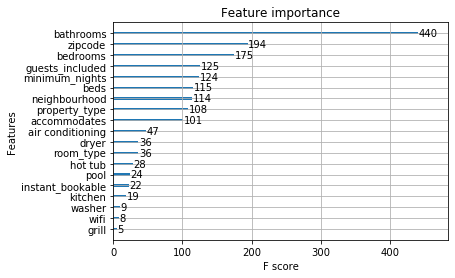

In [119]:
xgb.plot_importance(model)

In [191]:
# Convert processed data into an xgb.DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

In [192]:
def xgb_evaluate(colsample_bytree, gamma, learning_rate, max_delta_step, max_depth_step, min_child_weight, n_estimators, subsample):
    params = {'colsample_bytree': colsample_bytree,
              'eta': 0.1,
              'eval_metric': 'rmse',
              'gamma': gamma,
              'learning_rate': learning_rate,
              'max_delta_step': max_delta_step,
              'max_depth_step': int(max_depth_step),
              'min_child_weight': min_child_weight,
              'n_estimators': n_estimators,
              'seed': 9,
              'subsample': subsample}
    # Use around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=1000, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [43]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'colsample_bytree': (0.3, 1),
                                             'gamma': (0, 5),
                                             'learning_rate':(0.01,0.5),
                                             'max_delta_step': (0, 10),
                                             'max_depth_step': (1, 6),
                                             'min_child_weight':(0,5),
                                             'n_estimators':(850, 1200),
                                             'subsample': (0.4, 1.0)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=6, n_iter=10, acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_de... | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [44]:
file_name = "xgb_reg_bo.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_bo_loaded = pickle.load(open(file_name, "rb"))


[19:03:44] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
# Write our ensemble method - train 11 models, and weight them all equally by finding the mode of the votes for each well.
# The majority vote for each well is the consensus, which will be our predictions
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import random

random.seed(42)
count = 0
score = 0
scores = 0
prediction_votes=pd.DataFrame()
for num in range(1,2):
    seed = random.randint(1,9000)
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                          colsample_bynode=1, colsample_bytree=1, gamma=0,
                          importance_type='gain', learning_rate=0.1, max_delta_step=0,
                          max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
                          n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                          silent=None, subsample=1, verbosity=1).fit(X_train, y_train)
    predictions = model.predict(X_val)
    #score = accuracy_score(y_val, predictions)
    prediction_votes[num] = predictions
    scores += score
    count += 1
    print(score)
    y_pred_proba = model.predict_proba(X_train)[:,1]
    print('Test ROC AUC:', roc_auc_score(y_train, y_pred_proba))

print(f"The average accuracy score using these hyperparams over {count} iterations is {scores/count}")

0


AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

In [193]:
opt_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                          colsample_bynode=1, colsample_bytree=1, gamma=0,
                          importance_type='gain', learning_rate=0.1, max_delta_step=0,
                          max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
                          n_jobs=-1, nthread=None, objective='reg:squarederror', random_state=0,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                          silent=None, subsample=1, verbosity=1)
opt_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

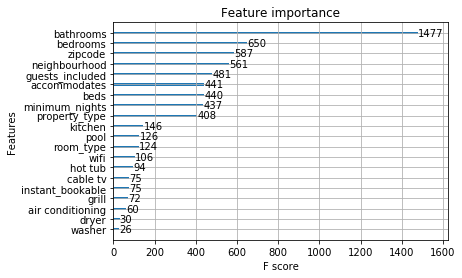

In [194]:
xgb.plot_importance(opt_model)

In [196]:
file_name = "opt_xgb_reg.pkl"

# save
pickle.dump(opt_model, open(file_name, "wb"))

In [197]:
data = pd.DataFrame.from_dict([{'beds': 1, 'bedrooms': 1.0, 'bathrooms': 1.0, 'accommodates': 2, 'guests_included': 1,
                 'minimum_nights': 2, 'instant_bookable': 0, 'zipcode': 90706, 'neighbourhood': 'Bellflower',
                  'property_type': 'Apartment', 'room_type': 'Entire home/apt', 'cable tv': True, 'wifi': True, 'kitchen': True,
                 'air conditioning': True, 'pool': True, 'hot tub': True, 'grill': True, 'washer': True, 'dryer': False
                  }])

def encode_data(df):
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        df[feature] = label_encoder.fit_transform(df[feature])
    return df

data = encode_data(data)

In [198]:
print(opt_model.predict(data))

[258.783]
